# Test scanning multiple QR Codes with opencv on cups

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def show_points_on_img(img, multiple_points):
    img_show = img.copy()
    for points in multiple_points:
        for point_pair_1, point_pair_2 in list(zip(points, points[1:])) + [(points[-1],points[0])]:
            point_pair_1 = (int(point_pair_1[0]), int(point_pair_1[1]))
            point_pair_2 = (int(point_pair_2[0]), int(point_pair_2[1]))
            cv2.line(img_show, point_pair_1, point_pair_2,  (255, 0, 0), 3)
    return img_show

No code detected


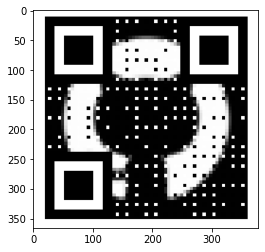

In [20]:
def display_file(path):
    file_img = cv2.imread(path,0)
    file_img = cv2.cvtColor(file_img, cv2.COLOR_BGR2RGB)
    detector = cv2.QRCodeDetector()
    show_img = file_img.copy()
    retval, decoded_data, multiple_points, _straight_qrcode = detector.detectAndDecodeMulti(show_img)
    if retval:
        show_img = show_points_on_img(show_img, multiple_points)
        print((retval, decoded_data, multiple_points, _straight_qrcode))
    else:
        print("No code detected")
    return show_img

plt.imshow(display_file('qr_examples/github.png'))
# plt.imshow(display_file('qr_examples/curved_7.jpg'))

# plt.imshow(display_file('qr_examples/qrcode-feature.jpg'))